# Sampling Profiles at Fire Locations

In [1]:
import numpy  as np

import matplotlib.pyplot as plt

from pyobs import vx14  as vx
from pyobs import csBin as cs

%matplotlib inline

## Range of Dates in 2020

In [2]:
vxd14_root = '/nfs3m/css/curated01/viirs/data/data/Level2/VJ114IMG/2020/'
d1, d2 = (214,306) # Aug 1 thru Oct 31

## Testing VIIRS ingest

[] Total number of fires: 85785


([<matplotlib.lines.Line2D at 0x2b68db685e80>], None)

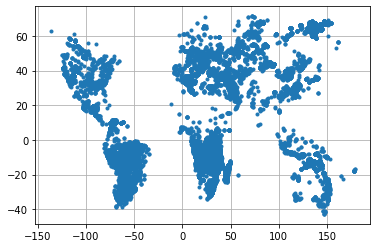

In [3]:
f =  vx.VX14(vxd14_root+'/%03d'%d1+'/*.nc',verbose=True)
plt.plot(f.ds.FP_longitude,f.ds.FP_latitude,'.'),plt.grid()

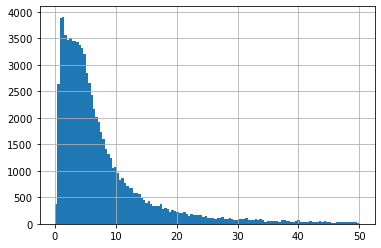

In [4]:
_ = plt.hist(f.ds.FP_power,128,range=(0,50)),plt.grid()

## Instatiate CS binning

In [5]:
# NetCDF filenwith cubed sphere coordinates
dyv2_dn  = '/css/g5nr/DYAMONDv2/'   # DYAMOND v2, 3km files on discover
const_fn = dyv2_dn + '03KM/DYAMONDv2_c2880_L181/const_2d_asm_Mx/202002/DYAMONDv2_c2880_L181.const_2d_asm_Mx.20200201_0000z.nc4'

csbin = cs.CSBIN(const_fn)


In [6]:
%time csbin.set_Indices(f.ds.FP_longitude, f.ds.FP_latitude)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 4 ms
